## 1.Linear Regression Equation

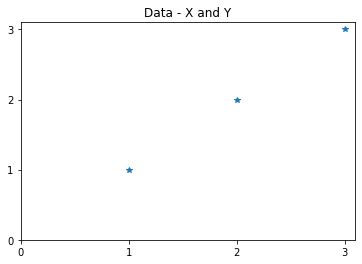

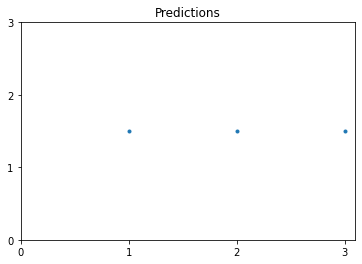

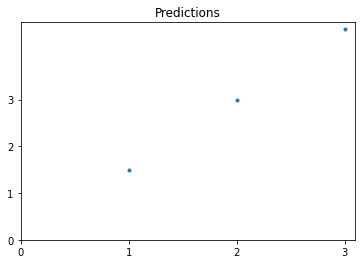

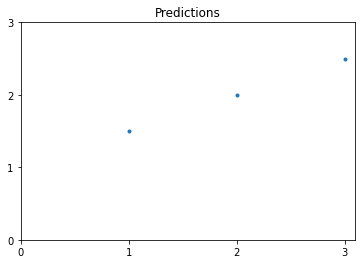

In [1]:
import matplotlib.pyplot as plt

x = [1, 2, 3]
y = [1, 2, 3]

plt.figure()
plt.title('Data - X and Y')
plt.plot(x,y,'*')
plt.xticks([0,1,2,3])
plt.yticks([0,1,2,3])
plt.show()

def linear_regression(theta0,theta1):
    predicted_y = []
    for i in x:
        predicted_y.append((theta0+(theta1*i)))
    plt.figure()
    plt.title('Predictions')
    plt.plot(x,predicted_y,'.')
    plt.xticks([0,1,2,3])
    plt.yticks([0,1,2,3])
    plt.show()

theta0 = 1.5
theta1 = 0
linear_regression(theta0,theta1)

theta0a = 0
theta1a = 1.5
linear_regression(theta0a,theta1a)

theta0b = 1
theta1b = 0.5
linear_regression(theta0b,theta1b)

## 2.Cost function

In [3]:
import matplotlib.pyplot as plt

x = [1, 2, 3]
y = [1, 2, 3]

m = len(y) 

def cost_function(theta0,theta1):
    predicted_y = [theta0+(theta1*1), theta0+(theta1*2), theta0+(theta1*3)]
    sum=0
    for i,j in zip(predicted_y,y):
        sum = sum+((i-j)**2) 
    J = 1/(2*m)*sum 
    return (J)

theta0 = [1.5,0,1]
theta1 = [0,1.5,0.5]

for i,j in zip(theta0,theta1):
    print ("cost when theta0=%r theta1=%r :"%(i,j), cost_function(i,j))

cost when theta0=1.5 theta1=0 : 0.4583333333333333
cost when theta0=0 theta1=1.5 : 0.5833333333333333
cost when theta0=1 theta1=0.5 : 0.08333333333333333


## 3.Contour Plot

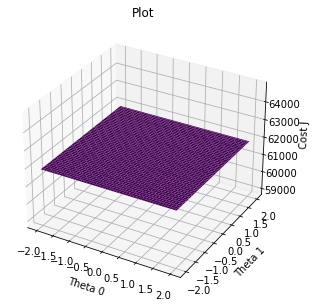

In [8]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(8, 5))
ax1 = fig.add_subplot(111, projection='3d')

values = 2
r = np.linspace(-values, values, 100)

theta0, theta1 = np.meshgrid(r, r)

original_y = np.array([1, 2, 3])
m = len(original_y)

predicted_y = np.array([theta0 + (theta1 * 1), theta0 + (theta1 * 2), theta0 + (theta1 * 3)])

sum_squared_error = np.sum((predicted_y - original_y[:, np.newaxis, np.newaxis]) ** 2)
J = sum_squared_error / (2 * m)

# Make sure J has the same shape as theta0 and theta1
J = np.broadcast_to(J, theta0.shape)

ax1.plot_surface(theta0, theta1, J, cmap='viridis')
ax1.set_xlabel('Theta 0')
ax1.set_ylabel('Theta 1')
ax1.set_zlabel('Cost J')

plt.title("Plot")
plt.show()

## 4.Gradient Descent

In [9]:
x = [1, 2, 3]
y = [1, 2, 3]

m = len(y)

theta0 = 1
theta1 = 1.5
alpha = 0.01

def cost_function(theta0, theta1):
    predicted_y = [theta0 + (theta1 * xi) for xi in x]
    sum_squared_error = sum((predicted_yi - yi) ** 2 for predicted_yi, yi in zip(predicted_y, y))
    J = sum_squared_error / (2 * m)
    return J

def gradientDescent(x, y, theta1, alpha):
    J_history = []
    for _ in range(50):
        for xi, yi in zip(x, y):
            delta = (1 / m) * (xi ** 2 * theta1 - xi * yi)
            theta1 = theta1 - alpha * delta
            J_history.append(cost_function(theta0, theta1))
    print(min(J_history))

gradientDescent(x, y, theta1, alpha)

0.5995100694321308


## 5.Multiple Linear Equation

In [10]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([[1, 800, 2, 15],[1, 1200, 3, 1],[1, 2400, 5, 5]])
y = np.array([3000000,2000000,3500000])
theta = np.array([100, 1000, 10000, 100000])

predicted_y = x.dot(theta.transpose())
print (predicted_y)

m = y.size
diff = predicted_y - y
squares = np.square(diff)
#sum_of_squares = 5424168464
sum_of_squares = np.sum(squares)
cost_fn = 1/(2*m)*sum_of_squares 
print (diff)
print (squares)
print (sum_of_squares)
print (cost_fn)

[2320100 1330100 2950100]
[-679900 -669900 -549900]
[-1592457968  2089411216  1742299280]
-2055714768
-342619128.0


## 6.Polynomial Regression

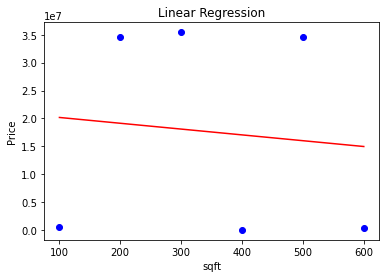

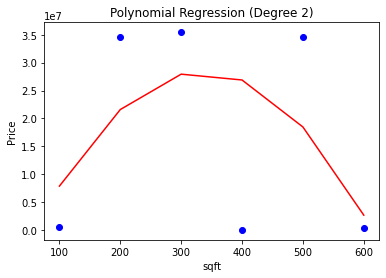

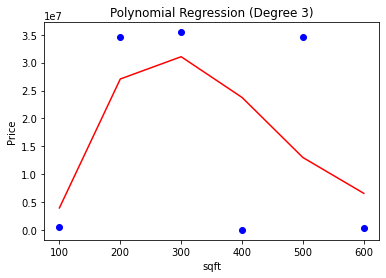

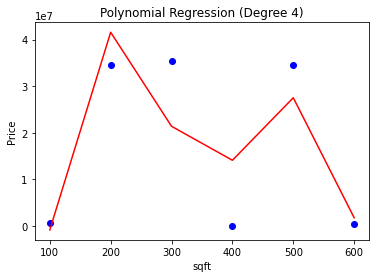

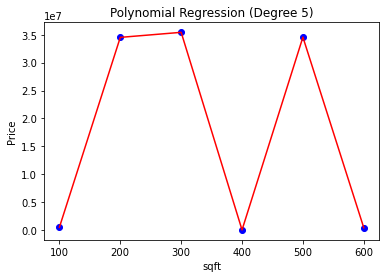

In [12]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 

X = pd.DataFrame([100, 200, 300, 400, 500, 600], columns=['sqft'])
y = pd.DataFrame([543543, 34543543, 35435345, 34534, 34534534, 345345], columns=['Price'])

lin = LinearRegression()   
lin.fit(X, y) 
plt.scatter(X, y, color='blue')   
plt.plot(X['sqft'], lin.predict(X), color='red')  # <-- Pass X['sqft'] instead of X
plt.title('Linear Regression') 
plt.xlabel('sqft') 
plt.ylabel('Price')   
plt.show() 

for i in [2, 3, 4, 5]:
    poly = PolynomialFeatures(degree=i) 
    X_poly = poly.fit_transform(X)   
    poly.fit(X_poly, y) 
    lin2 = LinearRegression() 
    lin2.fit(X_poly, y) 
    plt.scatter(X['sqft'], y, color='blue')  # <-- Pass X['sqft'] instead of X
    plt.plot(X['sqft'], lin2.predict(poly.fit_transform(X)), color='red')  # <-- Pass X['sqft'] instead of X
    plt.title(f'Polynomial Regression (Degree {i})') 
    plt.xlabel('sqft') 
    plt.ylabel('Price')   
    plt.show()

## 7.Loan Prediction

In [25]:
import os 
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV

data = pd.read_csv('loan_train_csv.csv')
l1 = ['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome',
      'LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']
l2 = ['Loan_Status']
l1_train, l1_test, l2_train, l2_test = train_test_split(data[l1], data[l2],test_size=0.25, random_state=1)

l2_train = l2_train.replace({'Y':1, 'N':0}).values
l2_test = l2_test.replace({'Y':1, 'N':0}).values     

print (l2_test)

[[0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]]


## 8.Logistic Regression

In [19]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression  # Correct import statement
from sklearn.model_selection import train_test_split, cross_val_score

df = pd.read_csv('spam.csv', delimiter=',', header=None, encoding='latin1')

X = df[1]  # Assuming the email text is stored in the second column
y = df[0]  # Assuming the labels are stored in the first column

# Perform text vectorization using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(logreg, X_train, y_train, cv=5)

# Print the mean cross-validation score
print("Mean Cross-Validation Score:", cv_scores.mean())

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Mean Cross-Validation Score: 0.9663528659791739


## 9.Confusion Matrix Precision Recall

Accuracy: 0.7
[[4 2]
 [1 3]]
(array([0.66666667, 0.75      ]), array([0.8, 0.6]), array([0.72727273, 0.66666667]), array([5, 5], dtype=int64))


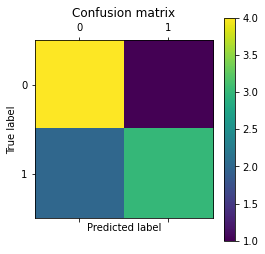

In [20]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_true = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 0, 0, 0, 0, 0, 1, 1, 1]

print ('Accuracy:', accuracy_score(y_true, y_pred))
print (confusion_matrix(y_pred,y_true))
print (precision_recall_fscore_support(y_true, y_pred))

plt.matshow(confusion_matrix(y_true, y_pred))
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## 10.Precission and Recall

Accuracy: 0.7
[[4 1]
 [2 3]]
(array([0.66666667, 0.75      ]), array([0.8, 0.6]), array([0.72727273, 0.66666667]), array([5, 5], dtype=int64))


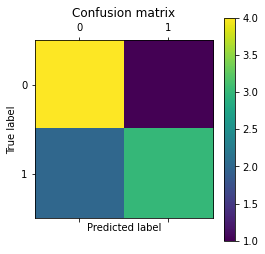

In [21]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_true = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 0, 0, 0, 0, 0, 1, 1, 1]

print ('Accuracy:', accuracy_score(y_true, y_pred))
print (confusion_matrix(y_true, y_pred))
print (precision_recall_fscore_support(y_true, y_pred))

plt.matshow(confusion_matrix(y_true, y_pred))
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## 11.Multiclass Classification

In [24]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import precision_recall_fscore_support
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB 
  
df = pd.read_csv('iris.csv')
X = df[list(df.columns)[:-1]]
y = df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)  

tree = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train) 
tree_predictions = tree.predict(X_test)   
print (tree.score(X_test, y_test))
print (confusion_matrix(y_test, tree_predictions))
print (precision_recall_fscore_support(y_test, tree_predictions))

svc = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
svc_predictions = svc.predict(X_test)  
print (svc.score(X_test, y_test))
print (confusion_matrix(y_test, svc_predictions))
print (precision_recall_fscore_support(y_test, svc_predictions))

knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)  
knn_predictions = knn.predict(X_test)  
print (knn.score(X_test, y_test)) 
print (confusion_matrix(y_test, knn_predictions))
print (precision_recall_fscore_support(y_test, knn_predictions))

gnb = GaussianNB().fit(X_train, y_train) 
gnb_predictions = gnb.predict(X_test) 
print (gnb.score(X_test, y_test))
print (confusion_matrix(y_test, gnb_predictions))
print (precision_recall_fscore_support(y_test, gnb_predictions))

0.9736842105263158
[[13  0  0]
 [ 0 16  0]
 [ 0  1  8]]
(array([1.        , 0.94117647, 1.        ]), array([1.        , 1.        , 0.88888889]), array([1.        , 0.96969697, 0.94117647]), array([13, 16,  9], dtype=int64))
1.0
[[13  0  0]
 [ 0 16  0]
 [ 0  0  9]]
(array([1., 1., 1.]), array([1., 1., 1.]), array([1., 1., 1.]), array([13, 16,  9], dtype=int64))
1.0
[[13  0  0]
 [ 0 16  0]
 [ 0  0  9]]
(array([1., 1., 1.]), array([1., 1., 1.]), array([1., 1., 1.]), array([13, 16,  9], dtype=int64))
1.0
[[13  0  0]
 [ 0 16  0]
 [ 0  0  9]]
(array([1., 1., 1.]), array([1., 1., 1.]), array([1., 1., 1.]), array([13, 16,  9], dtype=int64))


In [ ]:
12.

In [ ]:
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

df = pd.read_csv('./Consumer_Complaints.csv', sep=',', error_bad_lines=False, index_col=False, dtype='unicode')
df = df[pd.notnull(df['Issue'])]

fig = plt.figure(figsize=(8,6))
df.groupby('Product').Issue.count().plot.bar(ylim=0)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(df['Issue'], df['Product'], random_state = 0)
c = CountVectorizer()
clf = MultinomialNB().fit (TfidfTransformer().fit_transform(c.fit_transform(X_train)), y_train)

print(clf.predict(c.transform(["This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."])))

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.Issue).toarray()
print (features)
df['category_id'] = df['Product'].factorize()[0]
pro_cat = df[['Product', 'category_id']].drop_duplicates().sort_values('category_id')
print (pro_cat)
for i, j in sorted(dict(pro_cat.values).items()):
	indices = np.argsort(chi2(features, df.category_id == j)[0])
	print (indices)
	feature_names = np.array(tfidf.get_feature_names())[indices]
	unigrams = [i for i in feature_names if len(i.split(' ')) == 1]
	bigrams = [i for i in feature_names if len(i.split(' ')) == 2]
	print(">",i)
	print("unigrams:",','.join(unigrams[:5]))
	print("bigrams:",','.join(bigrams[:5]))



"""


print (features.shape)


df['category_id'] = df['Product'].factorize()[0]
pro_cat = df[['Product', 'category_id']].drop_duplicates().sort_values('category_id')
for i, j in sorted(dict(pro_cat.values).items()):
	indices = np.argsort(chi2(features, df.category_id == j)[0])
	feature_names = np.array(tfidf.get_feature_names())[indices]
	unigrams = [i for i in feature_names if len(i.split(' ')) == 1]
	bigrams = [i for i in feature_names if len(i.split(' ')) == 2]
	print(">",i)
	print("unigrams:",','.join(unigrams[:5]))
	print("bigrams:",','.join(bigrams[:5]))
"""

## 13.Clustering

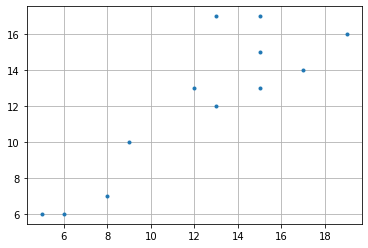

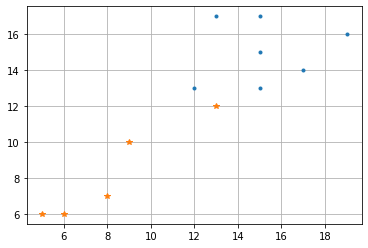

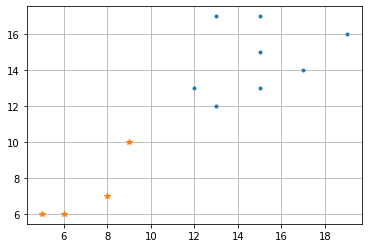

(15.142857142857142, 15.0, 8.2, 8.2)


In [26]:
import matplotlib.pyplot as plt
import math

def plots(cluster1_x1, cluster1_x2, cluster2_x1, cluster2_x2):
    plt.figure()
    plt.plot(cluster1_x1, cluster1_x2, '.')
    plt.plot(cluster2_x1, cluster2_x2, '*')
    plt.grid(True)
    plt.show()

def round1(c1_x1, c1_x2, c2_x1, c2_x2):
    cluster1_x1 = []
    cluster1_x2 = []
    cluster2_x1 = []
    cluster2_x2 = []

    for i, j in zip(x1, x2):
        a = math.sqrt((i - c1_x1) ** 2 + (j - c1_x2) ** 2)
        b = math.sqrt((i - c2_x1) ** 2 + (j - c2_x2) ** 2)
        if a < b:
            cluster1_x1.append(i)
            cluster1_x2.append(j)
        else:
            cluster2_x1.append(i)
            cluster2_x2.append(j)

    plots(cluster1_x1, cluster1_x2, cluster2_x1, cluster2_x2)

    c1_x1 = sum(cluster1_x1) / len(cluster1_x1)
    c1_x2 = sum(cluster1_x2) / len(cluster1_x2)
    c2_x1 = sum(cluster2_x1) / len(cluster2_x1)
    c2_x2 = sum(cluster2_x2) / len(cluster2_x2)

    round2(c1_x1, c1_x2, c2_x1, c2_x2)
    print((c1_x1, c1_x2, c2_x1, c2_x2))

def round2(c1_x1, c1_x2, c2_x1, c2_x2):
    cluster1_x1 = []
    cluster1_x2 = []
    cluster2_x1 = []
    cluster2_x2 = []

    for i, j in zip(x1, x2):
        c = math.sqrt((i - c1_x1) ** 2 + (j - c1_x2) ** 2)
        d = math.sqrt((i - c2_x1) ** 2 + (j - c2_x2) ** 2)
        if c < d:
            cluster1_x1.append(i)
            cluster1_x2.append(j)
        else:
            cluster2_x1.append(i)
            cluster2_x2.append(j)

    plots(cluster1_x1, cluster1_x2, cluster2_x1, cluster2_x2)

x1 = [15, 19, 15, 5, 13, 17, 15, 12, 8, 6, 9, 13]
x2 = [13, 16, 17, 6, 17, 14, 15, 13, 7, 6, 10, 12]

plots(x1, x2, [], [])
round1(x1[4], x2[4], x1[10], x2[10])

## 14.Elbow Method

1


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


2


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


3


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


4


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


5


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


6


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


7


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


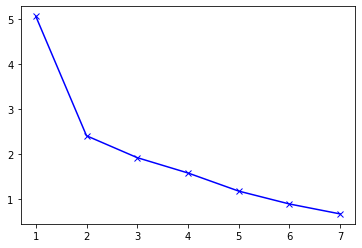

In [27]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

x1 = [15, 19, 15, 5, 13, 17, 15, 12, 8, 6, 9, 13]
x2 = [13, 16, 17, 6, 17, 14, 15, 13, 7, 6, 10, 12]

X = np.array(list(zip(x1, x2)))

distortions = []
K = range(1,8)
for i in K:
    print (i)
    model = KMeans(n_clusters=i)
    model.fit(X)
    distortions.append(sum(np.min(cdist(X, model.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

plt.plot()
plt.plot(K, distortions, 'bx-')
plt.show()

## 15.Silhouette Coefficient

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0 0 0 1 0 0 0 0 1 1 1 0]
0.6366488776743281


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[2 2 2 1 2 2 2 0 1 1 0 0]
0.44020495155817824


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[2 3 1 0 1 3 1 2 0 0 0 2]
0.44041109650563554


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0 2 3 1 3 2 3 0 1 1 4 0]
0.38043265897525885


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[2 3 0 5 0 6 2 4 1 5 7 4]
0.27672998081717154


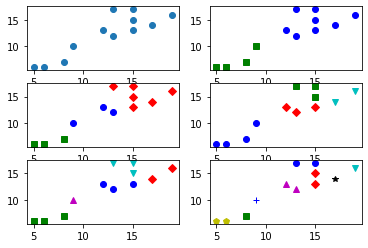

In [28]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
plt.subplot(3, 2, 1)

x1 = [15, 19, 15, 5, 13, 17, 15, 12, 8, 6, 9, 13]
x2 = [13, 16, 17, 6, 17, 14, 15, 13, 7, 6, 10, 12]
plt.scatter(x1, x2)

X = np.array(list(zip(x1, x2)))

c = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b']
m = ['o', 's', 'D', 'v', '^', 'p', '*', '+']

p = 1
for i in [2, 3, 4, 5, 8]:
    p += 1
    plt.subplot(3, 2, p)
    model = KMeans(n_clusters=i).fit(X)
    print (model.labels_)
    for i, j in enumerate(model.labels_):
        plt.plot(x1[i], x2[i], color=c[j], marker=m[j],ls='None')
    print (metrics.silhouette_score(X, model.labels_ ,metric='euclidean'))
plt.show()

## 16.SVC_Linear

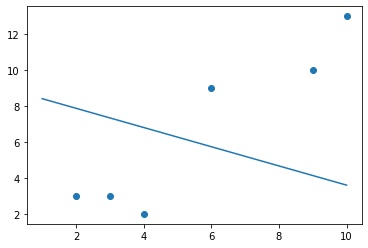

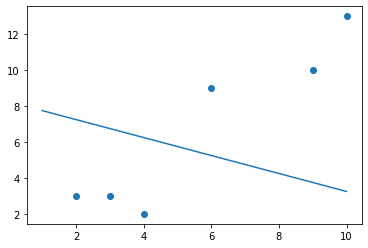

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import svm

def classifier(regressor):
    xx = np.linspace(1, 10)
    yy = -regressor.coef_[0][0] / regressor.coef_[0][1] * xx - regressor.intercept_[0] / regressor.coef_[0][1]
    plt.plot(xx, yy)
    plt.scatter(x1, x2)
    plt.show()

x1 = [2, 6, 3, 9, 4, 10]
x2 = [3, 9, 3, 10, 2, 13]

X = np.array([[2, 3], [6, 9], [3, 3], [9, 10], [4, 2], [10, 13]])
y = [0, 1, 0, 1, 0, 1]

regressor = LogisticRegression()
regressor.fit(X, y)
classifier(regressor)

regressor = svm.SVC(kernel='linear', C=1.0)
regressor.fit(X, y)
classifier(regressor)

## 17.SVM Nonlinear Kernel

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('iris.csv')
X = df.iloc[:, :-1]  # Use iloc to select all columns except the last one
y = df.iloc[:, -1]   # Use iloc to select the last column

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

logistic = LogisticRegression()
logistic.fit(X_train, y_train)  
y_pred = logistic.predict(X_test) 
print('Accuracy-logistic:', accuracy_score(y_test, y_pred))

gaussian = SVC(kernel='rbf') 
gaussian.fit(X_train, y_train)  
y_pred = gaussian.predict(X_test) 
print('Accuracy-svm:', accuracy_score(y_test, y_pred))

Accuracy-logistic: 1.0
Accuracy-svm: 1.0


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 18.PCA

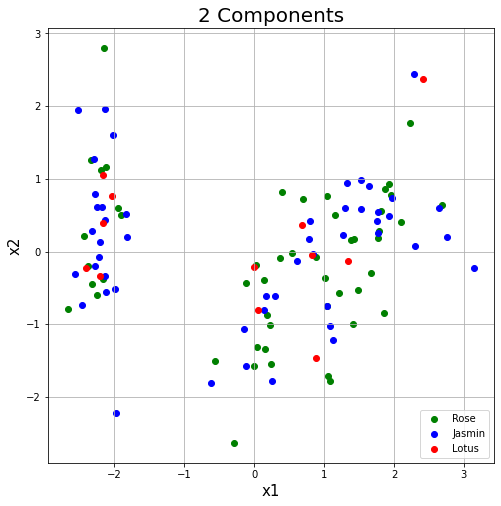

[0.72207932 0.24134489]
Index(['Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width', 'Flower'], dtype='object')
Index(['x1', 'x2', 'Flower'], dtype='object')


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_csv('flower.csv')
X = df[list(df.columns)[:-1]]
y = df['Flower']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)  

pca = PCA(n_components=2)
x = StandardScaler().fit_transform(X_train)
new_x = pd.DataFrame(data = pca.fit_transform(x), columns = ['x1', 'x2'])

df2 = pd.concat([new_x, df[['Flower']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('x1', fontsize = 15)
ax.set_ylabel('x2', fontsize = 15)
ax.set_title('2 Components', fontsize = 20)
for i, j in zip(['Rose', 'Jasmin', 'Lotus'],['g', 'b', 'r']):
    ax.scatter(df2.loc[df2['Flower'] == i, 'x1'], df2.loc[df2['Flower'] == i, 'x2'], c = j)
ax.legend(['Rose', 'Jasmin', 'Lotus'])
ax.grid()
plt.show()

print (pca.explained_variance_ratio_)

print (df.columns)
print (df2.columns)

## 18.perceptron

In [33]:
def predict(row, weights):
    activation = weights[0]
    for i in range(len(row)-1):
        activation += weights[i + 1] * row[i]
    return 1.0 if activation >= 0.0 else 0.0  # Changed ">" to ">=" for activation threshold

def train_weights(dataset, l_rate, n_epoch):
    weights = [0.0 for _ in range(len(dataset[0]))]
    for epoch in range(n_epoch):
        sum_error = 0.0
        for row in dataset:
            error = row[-1] - predict(row, weights)
            sum_error += error ** 2
            weights[0] = weights[0] + l_rate * error
            for i in range(len(row)-1):
                weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
        print('epoch=%d, error=%.2f' % (epoch, sum_error))
    print(weights)

dataset = [
    [0.4, 0.3, 1],
    [0.6, 0.8, 1],
    [0.7, 0.5, 1],
    [0.9, 0.2, 0]
]

l_rate = 0.1
n_epoch = 6
train_weights(dataset, l_rate, n_epoch)

epoch=0, error=1.00
epoch=1, error=3.00
epoch=2, error=2.00
epoch=3, error=2.00
epoch=4, error=1.00
epoch=5, error=0.00
[0.1, -0.13999999999999999, 0.12]


## 21.Perceptron

In [35]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron, LogisticRegression

categories = ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']

x1 = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
x2 = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(x1.data)
X_test = vectorizer.transform(x2.data)

classifier = LogisticRegression()
classifier.fit(X_train, x1.target)
predictions = classifier.predict(X_test)
print(classification_report(x2.target, predictions))

classifier = Perceptron(max_iter=100, eta0=0.1)
classifier.fit(X_train, x1.target)
predictions = classifier.predict(X_test)
print(classification_report(x2.target, predictions))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       396
           1       0.89      0.83      0.86       397
           2       0.91      0.86      0.89       399

    accuracy                           0.88      1192
   macro avg       0.88      0.88      0.88      1192
weighted avg       0.88      0.88      0.88      1192

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       396
           1       0.87      0.82      0.84       397
           2       0.88      0.88      0.88       399

    accuracy                           0.87      1192
   macro avg       0.87      0.87      0.87      1192
weighted avg       0.87      0.87      0.87      1192



## 22.MultiLayer Perceptron

Iteration: 150/150 | Cost 0.06 | Elapsed: 0:00:00 | ETA: 0:00:00

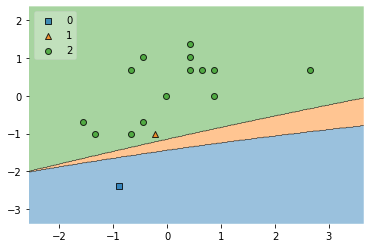

Iteration: 71/250 | Cost 0.09 | Elapsed: 0:00:00 | ETA: 0:00:00

Accuracy(epochs = 150): 93.75%


Iteration: 250/250 | Cost 0.04 | Elapsed: 0:00:00 | ETA: 0:00:00

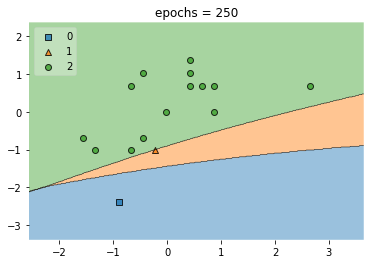

Accuracy(epochs = 250): 100.00%


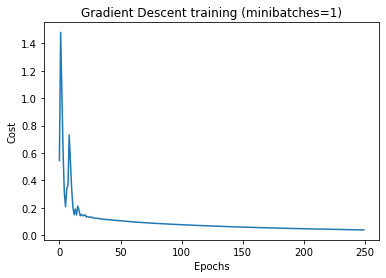

Iteration: 250/250 | Cost 0.02 | Elapsed: 0:00:01 | ETA: 0:00:00

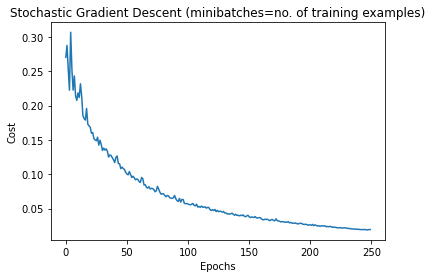

In [38]:
from mlxtend.classifier import MultiLayerPerceptron as MLP
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import numpy as np 

X = np.asarray([[6.1,1.4],[7.7,2.3],[6.3,2.4],[6.4,1.8],[6.2,1.8],[6.9,2.1],
[6.7,2.4],[6.9,2.3],[5.8,1.9],[6.8,2.3],[6.7,2.5],[6.7,2.3],[6.3,1.9],[6.5,2.1 ],[6.2,2.3],[5.9,1.8]] ) 

X = (X - X.mean(axis=0)) / X.std(axis=0)

y = np.asarray([0,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2]) 

nn = MLP(hidden_layers=[50],l2=0.00,l1=0.0,epochs=150,eta=0.05,
momentum=0.1,decrease_const=0.0,minibatches=1,random_seed=1,print_progress=3)
nn = nn.fit(X, y)

fig = plot_decision_regions(X=X, y=y, clf=nn, legend=2)
plt.show()
print('Accuracy(epochs = 150): %.2f%%' % (100 * nn.score(X, y)))

nn.epochs = 250
nn = nn.fit(X, y)
fig = plot_decision_regions(X=X, y=y, clf=nn, legend=2)
plt.title('epochs = 250')
plt.show()
print('Accuracy(epochs = 250): %.2f%%' % (100 * nn.score(X, y)))

plt.plot(range(len(nn.cost_)), nn.cost_)
plt.title('Gradient Descent training (minibatches=1)')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.show()

nn.minibatches = len(y)
nn = nn.fit(X, y)
plt.plot(range(len(nn.cost_)), nn.cost_)
plt.title('Stochastic Gradient Descent (minibatches=no. of training examples)')
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.show()

## 22.Decision Trees

In [13]:
from sklearn.datasets import load_iris
import pandas as pd

from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('flower.csv')
X = df[list(df.columns)[:-1]]
y = df['Flower']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)  

# entropy for information gain
a = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=4, min_samples_leaf=5)  

a.fit(X_train, y_train) 
y_pred = a.predict(X_test) 
y_train.to_csv('SSS.csv')
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred)) 
print ("Accuracy : ", accuracy_score(y_test,y_pred)*100) 
print("Report : ", classification_report(y_test, y_pred)) 

b = RandomForestClassifier(max_depth = None, n_estimators=100)
b.fit(X_train,y_train)
y_pred = b.predict(X_test) 
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred)) 
print ("Accuracy : ", accuracy_score(y_test,y_pred)*100) 
print("Report : ", classification_report(y_test, y_pred)) 

Confusion Matrix:  [[15  1  0]
 [ 3  6  0]
 [ 0  0 13]]
Accuracy :  89.47368421052632
Report :                precision    recall  f1-score   support

      Jasmin       0.83      0.94      0.88        16
       Lotus       0.86      0.67      0.75         9
        Rose       1.00      1.00      1.00        13

    accuracy                           0.89        38
   macro avg       0.90      0.87      0.88        38
weighted avg       0.90      0.89      0.89        38

Confusion Matrix:  [[15  1  0]
 [ 0  9  0]
 [ 0  0 13]]
Accuracy :  97.36842105263158
Report :                precision    recall  f1-score   support

      Jasmin       1.00      0.94      0.97        16
       Lotus       0.90      1.00      0.95         9
        Rose       1.00      1.00      1.00        13

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

